## Model Evaluation

Model evaluation is a crucial step in machine learning that helps determine how well a model performs on unseen data. For both regression and classification problems, evaluation metrics provide insights into accuracy, reliability, and potential areas for improvement. 

In regression, metrics like Root Mean Squared Error (RMSE) and R-squared measure how well a model predicts continuous values, while classification models are assessed using metrics such as accuracy, precision, recall, and F1-score to evaluate their ability to correctly categorize data points. 

Choosing the right evaluation metric depends on the problem at hand and ensures that the model aligns with the intended objectives.

In [30]:
import numpy as np

### Regression Problems

Model Evaluation is fairly simple for regression problems. Just use RMSE!

Let's start this example by randomly creating our data and predicted values. Later on, we'll work with actual data and use machine learning to create actual predicted values, but for now this will work just to show the process. Remember that all of this data is only the test set! Minimizing test set RMSE is our goal here.

In [31]:
# import the RMSE function
from sklearn.metrics import root_mean_squared_error

In [48]:
# generate random normally distributed actual values
reg_actual = np.random.normal(loc=50, scale=10, size=10)  # mean=50, std=10, 10000 samples
reg_predicted = np.random.normal(loc=50, scale=10, size=10)

print(f"Actual: {reg_actual[:5]}")
print(f"Predicted: {reg_predicted[:5]}")

Actual: [55.85198895 56.4738889  47.22328914 53.892536   50.0257145 ]
Predicted: [40.58065349 39.84115757 43.14389811 60.14506438 38.5588425 ]


In [49]:
# calculate RMSE
rmse = root_mean_squared_error(reg_actual, reg_predicted)
print(f"RMSE: {rmse:.4f}") # print RMSE rounded to 4 decimals

RMSE: 10.4990


### Classification Problems

In [34]:
# import some classification evaluation functions
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve, roc_auc_score,
    log_loss
)

Similar to what we did above, let's generate new randomly created data for a classification problem. But this time, it looks a little different.

Our actual values are a list of 0s and 1s, because this is how this data will appear in the real world. This is the definition of a classification problem.

Our predicted values are a list of predicted probabilities between 0 and 1, because this is what a Machine Learning model will return.

In [35]:
# generate random uniformly distributed actual values
class_actual = np.random.randint(0, 2, 10000) # 1s and 0s
class_predicted_probs = np.random.uniform(0, 1, 10000) # probabilities between 0 and 1
class_predicted = [1 if prob > 0.5 else 0 for prob in class_predicted_probs]

print(f"Actual: {class_actual[:5]}")
print(f"Predicted Probabilities: {class_predicted_probs[:5]}")
print(f"Predicted: {class_predicted[:5]}")

Actual: [1 0 1 1 1]
Predicted Probabilities: [0.80084063 0.34125716 0.55178854 0.11943874 0.59649625]
Predicted: [1, 0, 1, 0, 1]


In [36]:
# calculate accuracy
accuracy = accuracy_score(class_actual, class_predicted)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [37]:
# calculate precision
precision = precision_score(class_actual, class_predicted)
print(f"Precision: {precision:.2f}")

Precision: 0.50


In [38]:
# calculate recall
recall = recall_score(class_actual, class_predicted)
print(f"Recall: {recall:.2f}")

Recall: 0.50


In [39]:
# calculate f1 score
f1score = f1_score(class_actual, class_predicted)
print(f"f1 score: {f1score:.2f}")

f1 score: 0.50


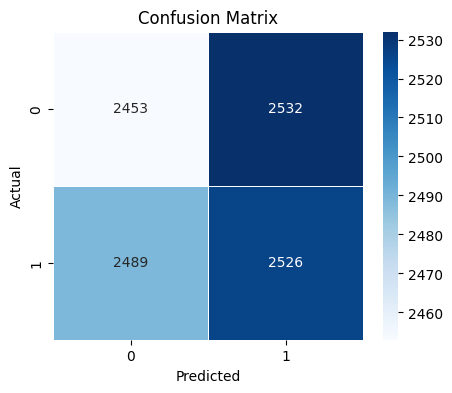

In [40]:
# import necessary packages
import seaborn as sns
import matplotlib.pyplot as plt

# define confusion matrix
cm = confusion_matrix(class_actual, class_predicted)

# plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

For these final two model evaluation metrics in classification, you will need to use the predicted probabilities instead of the predicted classes!

In [41]:
# calculate ROC AUC
roc_auc = roc_auc_score(class_actual, class_predicted_probs)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.50


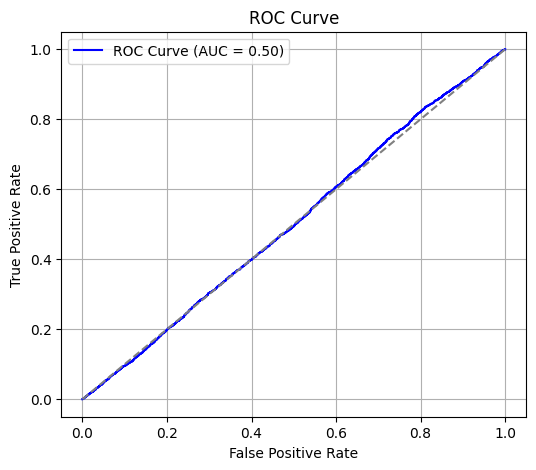

In [42]:
# plot ROC curve
fpr, tpr, _ = roc_curve(class_actual, class_predicted_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [43]:
# calculate the baseline log loss (every prediction is equal to the proportion of 1s)
baseline = log_loss(class_actual, [np.mean(class_actual)] * len(class_actual))

# calculate log loss
logloss = log_loss(class_actual, class_predicted_probs)

print(f"Baseline: {baseline:.2f}")
print(f"Log Loss: {logloss:.2f}")

Baseline: 0.69
Log Loss: 0.99


Unfortunately, log loss doesn't have a good interpretation, and it doesn't necessarily fall between 0 and 1! Our objective is simply to lower it. But to lower it from what? How do we know what a good log loss is? For this, we compare our model's log loss to a baseline.

This baseline is found using the actual data. All we do is take the percentage of 1s in our data (if half of our data is 1s and half is 0s, then this would be 50%) and predict that value for every single row. Therefore, you get a medium 'penalty' for every single row. Then, calculate the log loss. Hopefully, we can do better than this though!

In this case, you can see the random model actually does a lot worse than the baseline. This is because the probabilites are randomly generated from a uniform distribution between 0 and 1... so sometimes, the probability will be way off (i.e. probability 10% but it's actually a 1). Log loss penalizes this very heavily! What a shocker, a random model is not good.